<a href="https://colab.research.google.com/github/Padmanaba231/AI_LAB_PROJECT/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [134]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Raw Images

What Should I do?
*   Jumlah Gambar ✅
*   Distribusi Dimensi Gambar ✅
*   Dimensi Gambar Terendah ✅
*   Jumlah Format Gambar ✅
*   Menampilkan Beberapa Gambar ✅
*   Color Distribution
*   Identifikasi Kualitas Gambar ✅
*   Konsistensi Gambar (Mencari Sudut Aneh Pada Gambar)









In [ ]:
# Fungsi untuk mendapatkan informasi gambar  
def analyze_images(image_folder):  
    image_data = []  
    formats = []  
    color_distributions = []  
      
    for filename in os.listdir(image_folder):  
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  
                height, width, channels = img.shape  
                image_data.append((filename, height, width))  
                formats.append(filename.split('.')[-1])  
  
    return image_data, formats
  
# Fungsi untuk menampilkan beberapa gambar  
def display_all_images(image_folder, num_images=5):  
    images = []  
    for filename in os.listdir(image_folder):  
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  
                images.append(img)  
                if len(images) >= num_images:  
                    break  
  
    plt.figure(figsize=(15, 5))  
    for i, img in enumerate(images):  
        plt.subplot(1, num_images, i + 1)  
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
        plt.axis('off')  
    plt.show()  
  
# Main  
image_folder = 'Data_fixed/Images'  # Ganti dengan path folder gambar Anda  
image_data, formats = analyze_images(image_folder)  

pada kode diatas digunakan untuk menganalisis gambar serta fungsi untuk menampilkan beberapa gambar dari folder

### Jumlah Gambar

In [99]:
#mengetahui jumlah gambarnya
num_images = len(image_data)
print(f'Jumlah gambar keseluruhan: {num_images}')

Jumlah gambar keseluruhan: 2427


### Distribusi Dimensi Gambar

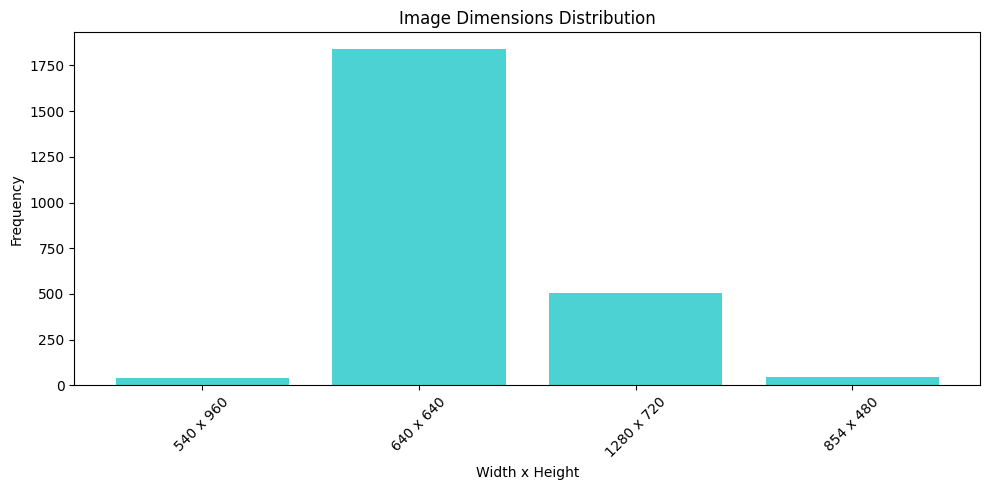

Distribusi dimensi gambar:
Dimensi (960, 540): 38 gambar
Dimensi (640, 640): 1839 gambar
Dimensi (720, 1280): 506 gambar
Dimensi (480, 854): 44 gambar


In [45]:
dimensions = [(height, width) for _, height, width in image_data]  
dimension_counts = Counter(dimensions) 

# data labels dan counts untuk visualisasi data
labels = [f"{width} x {height}" for height, width in dimension_counts.keys()] 
counts = list(dimension_counts.values())

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='c', alpha=0.7)
plt.title('Image Dimensions Distribution')
plt.xlabel('Width x Height')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Distribusi dimensi gambar:")  
for dim, count in dimension_counts.items():  
    print(f"Dimensi {dim}: {count} gambar")  

dari grafik diatas dapat disimpulkan bahwa gambar dengan dimensi 640x640 memiliki dimensi paling banyak dibandingkan dengan dimensi gambar yang lain

### Mencari Gambar dengan Resolusi Terendah

In [46]:
min_dimension = min(dimensions, key=lambda x: x[0] * x[1])  
print(f"Dimensi gambar terendah: {min_dimension}")

Dimensi gambar terendah: (640, 640)


### Aspec Ratio Distribution

Jumlah aspect ratio setiap gambar :
0.5625 : 38
1.0 : 1839
1.7777777777777777 : 506
1.7791666666666666 : 44


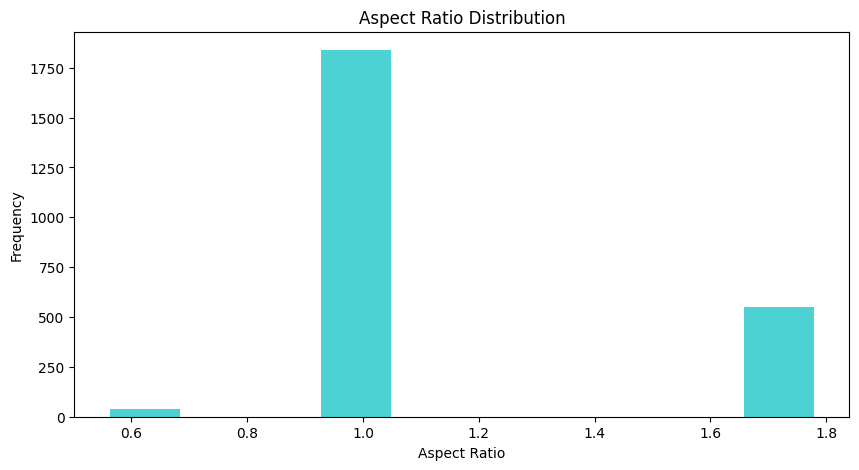

In [100]:
aspect_ratios = [(width / height) for _, height, width in image_data]  

aspect_ratios_counts = Counter(aspect_ratios)

print("Jumlah aspect ratio setiap gambar :")
for label, count in aspect_ratios_counts.items():  
    print(f'{label} : {count}') 

plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=10, color='c', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

dari graf histogram diatas dapat disimpulkan bahwa graf

### jumlah Format Gambar

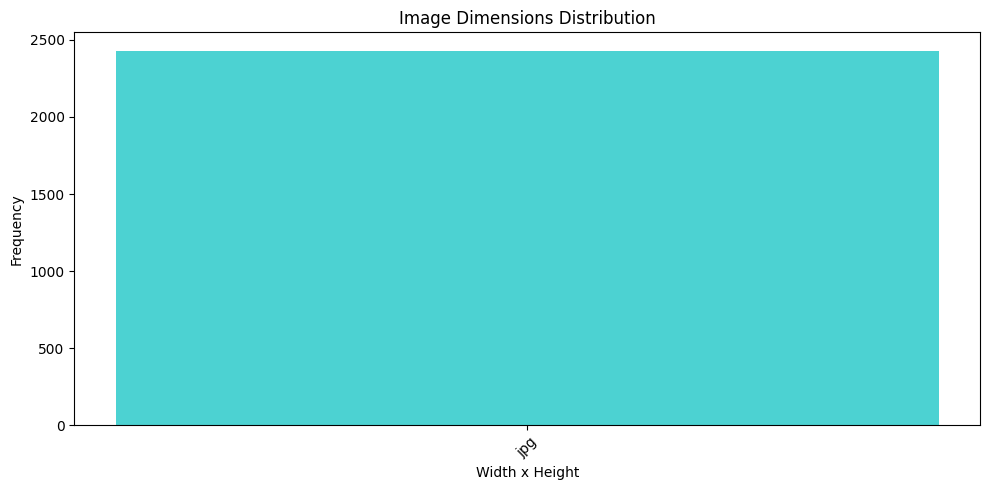

Jumlah Format Gambar
jpg : 2427


In [62]:
#jumlah format gambar
format_counts = Counter(formats)

labels = list(format_counts.keys())
counts = list(format_counts.values())

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='c', alpha=0.7)
plt.title('Image Dimensions Distribution')
plt.xlabel('Width x Height')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Jumlah Format Gambar')
for format, counts in format_counts.items():
  print(f'{format} : {counts}')


### Menampilkan Beberapa Gambar

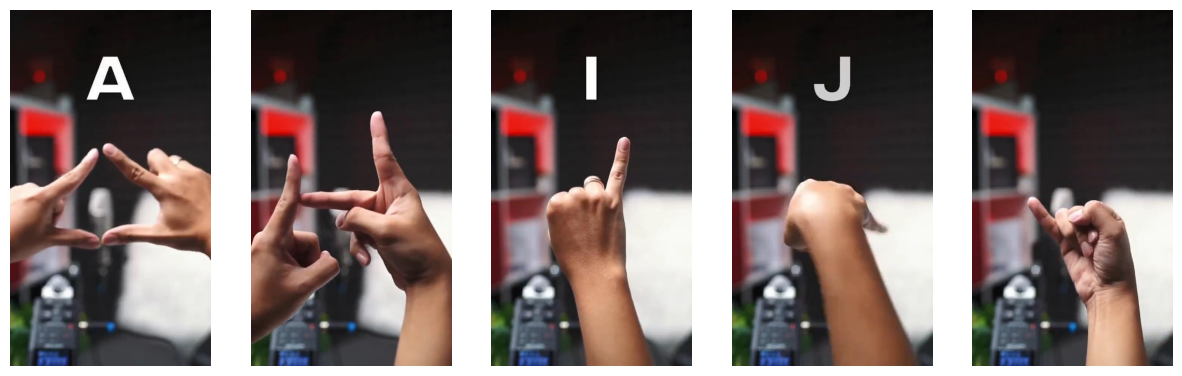

In [ ]:
display_all_images(image_folder, num_images=5)  

### Color Distribution

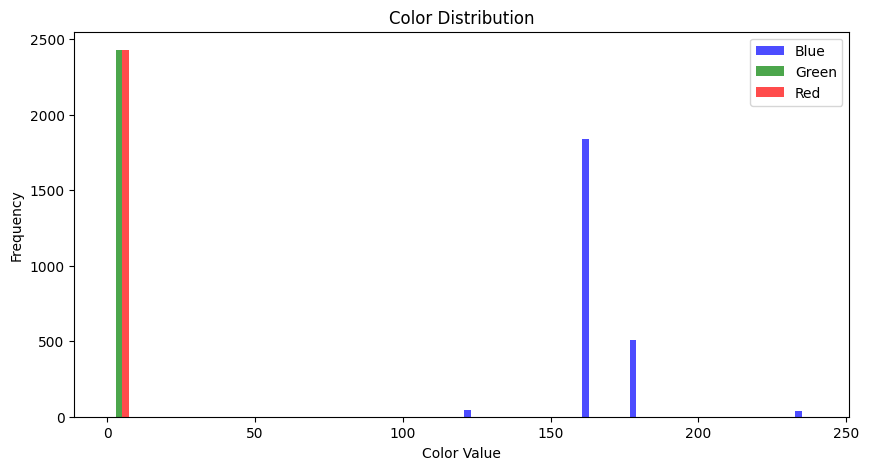

In [ ]:
def plot_color_distribution(image_data):
    all_colors = []
    for _, img, _ in image_data:
        avg_color = cv2.mean(img)[:3]
        all_colors.append(avg_color)

    avg_colors = np.array(all_colors)
    plt.figure(figsize=(10, 5))
    plt.hist(avg_colors, bins=30, label=['Blue', 'Green', 'Red'], color=['b', 'g', 'r'], alpha=0.7)
    plt.title('Color Distribution')
    plt.xlabel('Color Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_color_distribution(image_data)

### Detect Angel of Images

Total keseluruhan gambar : 2427
Gambar dengan sudut aneh: 1262
Gambar dengan sudut Normal: 175


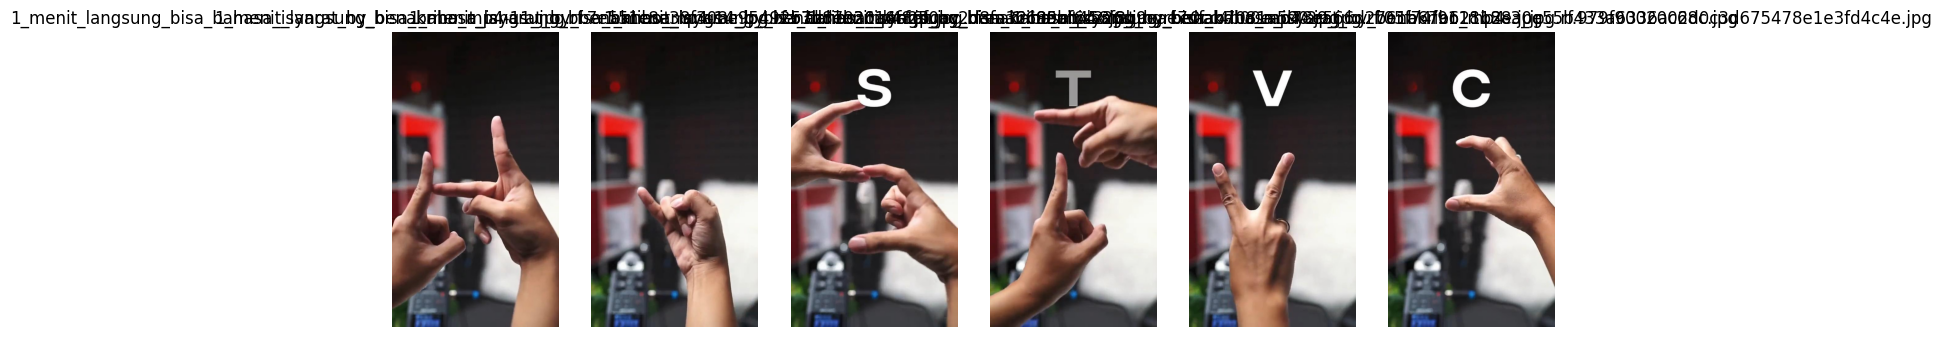

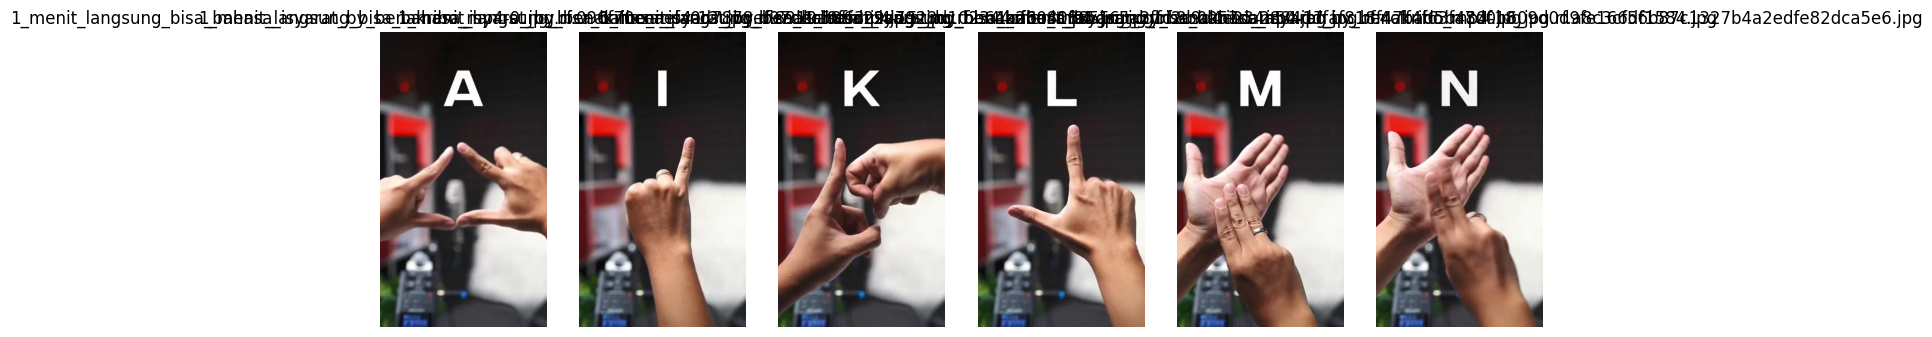

In [ ]:
def display_images(images, num_images=5):  
    plt.figure(figsize=(15, 5))  
    for i, (filename, img) in enumerate(images[:num_images]):  # Hanya menampilkan num_images  
        plt.subplot(1, num_images, i + 1)  
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
        plt.title(filename)  
        plt.axis('off')  
    plt.show()

# Fungsi untuk mencari gambar dengan sudut aneh  
def find_images_with_strange_angles(image_folder):  
    strange_images = []  
    normal_images = []
    for filename in os.listdir(image_folder):  
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  
                # Menghitung sudut menggunakan deteksi tepi  
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #mengubah gambar menjadi grayscale
                edges = cv2.Canny(gray, 200, 300)  #menggunakan garis tepi untuk menemukan tepo dalam gambar
                lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)  #menggunakan transformasi hough untuk mendeteksi gambar

                if lines is not None:  
                    angles = [np.degrees(np.arctan2(np.sin(line[0][1]), np.cos(line[0][1]))) for line in lines]  
                    if any(abs(angle) > 45 for angle in angles):  # mencari gambar yang memiliki Sudut aneh  
                        strange_images.append((filename, img))  # Simpan nama file dan gambar
                    else:
                        normal_images.append((filename, img)) 
  
    return strange_images, normal_images


strange_images, normal_images = find_images_with_strange_angles(image_folder)  
print(f'Total keseluruhan gambar : {len(image_data)}')
print(f'Gambar dengan sudut aneh: {len(strange_images)}')  
print(f'Gambar dengan sudut Normal: {len(normal_images)}') 

if strange_images:  
    display_images(strange_images, num_images=6)  
else:  
    print("Tidak ada gambar dengan sudut aneh ditemukan.")  

if normal_images:  
    display_images(normal_images, num_images=6)  
else:  
    print("Tidak ada gambar dengan sudut aneh ditemukan.") 

### Detect Images With CV2

In [157]:
def detect_upper_body(image):  
    # Load the Haar cascade for detecting upper bodies  
    upper_body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')  
      
    # Check if the cascade is loaded correctly  
    if upper_body_cascade.empty():  
        raise Exception("Haar cascade not loaded. Check the path.")  
  
    # Convert to grayscale for detection  
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
      
    # Apply Gaussian blur to reduce noise  
    gray = cv2.GaussianBlur(gray, (5, 5), 0)  
      
    # Apply histogram equalization to improve contrast  
    gray = cv2.equalizeHist(gray)  
      
    # Detect upper bodies in the image  
    upper_bodies = upper_body_cascade.detectMultiScale(  
        gray,  
        scaleFactor=1.1,  # Adjust this value for better accuracy  
        minNeighbors=3,    # Lowered to reduce false negatives  
        minSize=(30, 30),  # Minimum size of detected upper body  
        flags=cv2.CASCADE_SCALE_IMAGE  
    )  
      
    # Apply Non-Maximum Suppression to eliminate duplicate detections  
    if len(upper_bodies) > 0:  
        boxes = np.array(upper_bodies)  
        x1 = boxes[:, 0]  
        y1 = boxes[:, 1]  
        x2 = boxes[:, 0] + boxes[:, 2]  
        y2 = boxes[:, 1] + boxes[:, 3]  
        scores = np.ones(len(boxes))  # Dummy scores for NMS  
        indices = cv2.dnn.NMSBoxes(list(zip(x1, y1, x2, y2)), scores.tolist(), score_threshold=0.5, nms_threshold=0.4)  
          
        # Filter boxes based on NMS results  
        upper_bodies = boxes[indices].reshape(-1, 4)  
  
    return len(upper_bodies), upper_bodies  # Return both count and detections  
  
def categorize_images(image_folder):  
    no_people = []  
    one_person = []  
    more_than_one_person = []  
  
    for filename in os.listdir(image_folder):  
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            img = img[:50]
            if img is not None:  
                upper_body_count, upper_body = detect_upper_body(img)  
                print(upper_body_count)
                # Categorize based on the number of detected upper bodies  
                if upper_body_count == 0:  
                    no_people.append((filename, img))  
                elif upper_body_count == 1:  
                    one_person.append((filename, img))  
                else:  
                    more_than_one_person.append((filename, img))  
  
    return no_people, one_person, more_than_one_person  
  

no_people,one_person,more_than_one_person = categorize_images(image_folder)
# Display the categorized images      
if no_people:      
    display_images(no_people, num_images=3)      
else:      
    print("No images with no people found.")      
  
if one_person:      
    display_images(one_person, num_images=3)      
else:      
    print("No images with one person found.")      
  
if more_than_one_person:      
    display_images(more_than_one_person, num_images=3)      
else:     
    print("No images with more than one person found.")      


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

## Resized Images